In [1]:
#（シャープ）以降の文字はプログラムに影響しません。
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd
from pandas.tools import plotting # 高度なプロットを行うツールのインポート
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
# import urllib # Python 2 の場合
import urllib.request # Python 3 の場合
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

## 3種類についてやってみました。  


###ーーーーーーーーーーーーーーーーーーーーーーーーーーー 
###好きなアイスクリームアンケート    
###ーーーーーーーーーーーーーーーーーーーーーーーーーーー

In [97]:
df = pd.read_csv('icecream_chosa.txt', sep='\s') # データの読み込み
dfs = df.apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0)

/Users/amano/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/pandas/io/parsers.py:648: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  ParserWarning)


In [98]:
from matplotlib.colors import LinearSegmentedColormap
def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))

    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

In [99]:
gender = [x for x in dfs['gender']]

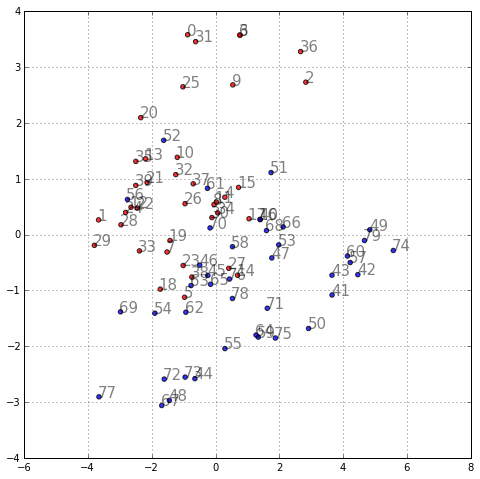

In [100]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
cm = generate_cmap(['blue', 'red'])
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.index):
    plt.text(x, y, name, alpha=0.5, size=15)
plt.scatter(feature[:, 0], feature[:, 1], c=gender, alpha=0.8, cmap=cm)
plt.grid()
plt.show()

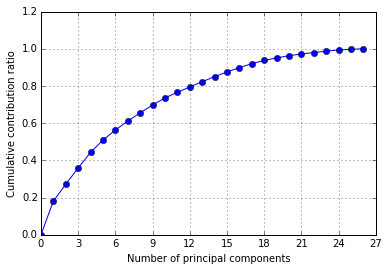

In [101]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution ratio")
plt.grid()
plt.show()

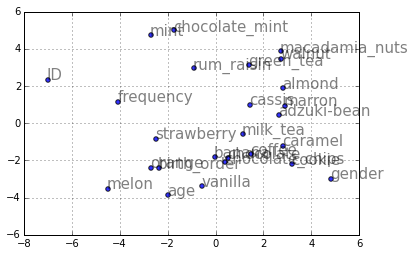

In [102]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :].T)
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :].T)
# 第一主成分と第二主成分でプロットする
plt.figure()
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.columns):
    plt.text(x, y, name, alpha=0.5, size=15)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.grid()
plt.show()

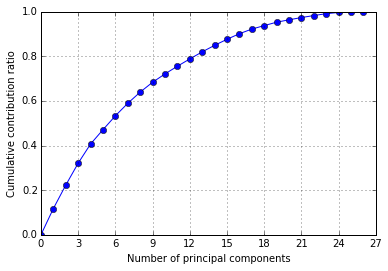

In [103]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution ratio")
plt.grid()
plt.show()

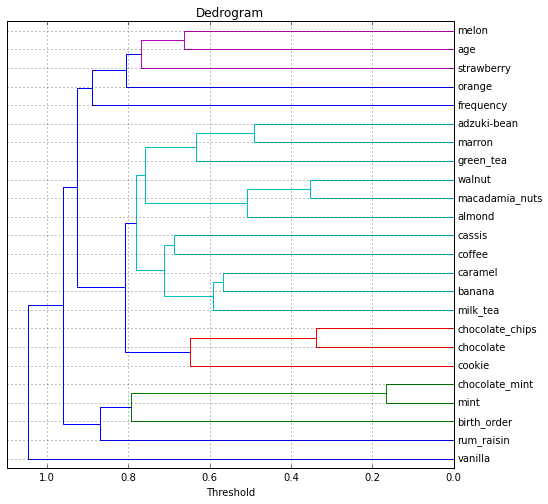

In [104]:
# metric は色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
# method も色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
#y_labels.append("1")
from scipy.cluster.hierarchy import linkage, dendrogram
result1 = linkage(dfs.iloc[:, 2:].T, 
                  #metric = 'braycurtis', 
                  #metric = 'canberra', 
                  #metric = 'chebyshev', 
                  #metric = 'cityblock', 
                  metric = 'correlation', 
                  #metric = 'cosine', 
                  #metric = 'euclidean', 
                  #metric = 'hamming', 
                  #metric = 'jaccard', 
                  #method= 'single')
                  method = 'average')
                  #method= 'complete')
                  #method='weighted')
#dendrogram(result1, labels = list(df.iloc[:, 0:1]))
plt.figure(figsize=(8, 8))
dendrogram(result1, orientation='right', labels=list(df.columns), color_threshold=0.8)
plt.title("Dedrogram")
plt.xlabel("Threshold")
plt.grid()
plt.show()

In [105]:
feature_names = df.columns[1:]
target_names = list(set(df.iloc[1:, ]))
sample_names = df.index
data = df.iloc[:, 1:]
target = df.iloc[:, 1]

In [106]:
from sklearn import cross_validation as cv
train_data, test_data, train_target, test_target = cv.train_test_split(data, target, test_size=0.5)

In [107]:
train_data

,gender,age,birth_order,frequency,vanilla,strawberry,milk_tea,macadamia_nuts,cookie,chocolate,...,banana,caramel,walnut,cassis,chocolate_chips,orange,green_tea,marron,chocolate_mint,adzuki-bean
21,2,21,1,4,7,9,9,7,9,8,...,8,8,8,5,8,6,7,8,4,8
22,2,21,2,4,8,8,9,8,8,8,...,5,8,8,4,9,8,9,5,5,8
47,1,18,2,4,7,4,5,8,7,8,...,3,4,5,5,7,7,6,3,3,6
41,1,19,4,4,9,9,5,5,5,7,...,1,4,1,1,9,7,6,3,7,1
56,1,22,1,3,9,9,9,9,9,6,...,7,8,6,6,8,7,9,7,1,9
1,2,21,2,1,7,8,9,9,9,9,...,4,7,8,9,9,4,7,7,8,9
49,1,19,1,1,9,6,7,5,5,1,...,1,3,5,4,1,7,9,5,1,4
37,2,20,2,4,9,4,7,7,9,8,...,5,7,5,3,8,7,6,7,6,4
18,2,21,4,6,5,9,8,5,7,5,...,6,6,7,7,8,7,9,5,8,5
0,2,20,2,5,7,7,8,3,9,9,...,7,9,3,3,9,7,8,8,1,7


In [108]:
# 様々なパラメータ（ハイパーパラメータという）で学習し、分離性能の最も良いモデルを選択する。
parameters = [
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
    {'kernel': ['rbf'],     'C': [1, 10, 100, 1000], 'gamma': [1e-2, 1e-3, 1e-4]},      
    {'kernel': ['poly'],'C': [1, 10, 100, 1000], 'degree': [2, 3, 4, 5]}]

In [109]:
from sklearn import svm
from sklearn.metrics import accuracy_score
import time
start = time.time()
from sklearn import grid_search

# train_data を使って、SVM による学習を行う
gs = grid_search.GridSearchCV(svm.SVC(), parameters, n_jobs=2).fit(train_data, train_target)

# 分離性能の最も良かったモデルが何だったか出力する
print(gs.best_estimator_)

# モデル構築に使わなかったデータを用いて、予測性能を評価する
pred_target = gs.predict(test_data)
print ("Accuracy_score:{0}".format(accuracy_score(test_target, pred_target)))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.001,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Accuracy_score:0.55
elapsed_time:0.47602105140686035


In [110]:
# 予測結果と、本当の答えを比較する
df = pd.DataFrame(columns=['test', 'pred'])
df['test'] = test_target # 本当の答え
df['pred'] = pred_target # 予測された答え
df.T

,42,75,55,50,45,54,35,40,20,27,...,3,7,78,25,73,72,51,6,24,31
test,1,1,1,1,1,1,2,1,2,2,...,2,2,1,2,1,1,1,2,2,2
pred,1,1,2,1,1,2,1,1,1,2,...,1,2,1,1,2,2,2,1,2,1


In [111]:
accuracy_scores=[]
for i in range(10):
    train_data, test_data, train_target, test_target = cv.train_test_split(data, target, test_size=0.8)
    start = time.time()
    # train_data を使って、SVM による学習を行う
    gs = grid_search.GridSearchCV(svm.SVC(), parameters, n_jobs=2).fit(train_data, train_target)

    # モデル構築に使わなかったデータを用いて、予測性能を評価する
    pred_target = gs.predict(test_data)
    accuracy_scores.append(accuracy_score(test_target, pred_target))

In [112]:
print(accuracy_scores)
print(np.average(accuracy_scores))

[0.609375, 0.609375, 0.46875, 0.5625, 0.53125, 0.46875, 0.671875, 0.578125, 0.515625, 0.46875]
0.5484375


## 考察  
PCAで第一主成分と第二主成分でプロットしたところ、なんとなく男女(青と赤)が分かれていそうな見た目であった。  
また、アイスの種類など各要素の相関係数をaverageリンケージで階層的クラスタリングすると、チョコミントとミント、チョコとチョコチップはそれぞれ近い関係にあった。しかしクラスター単位で見ると、それぞれの属する可能性のあるクラスターはあまり近い関係になかった。チョコミントはチョコ関連なのに。  
つまりチョコミントを食べたいと思う人は、どちらかというとミントが食べたくてチョコミントを頼むのであって、それほど甘いチョコを欲しているわけではなさそうだと推測される。  
また、2分割のSVM(クロスバリデーションはしてません)で男女の予測を行った結果、およそ半分くらいの精度で男女の予測ができた。
精度としては低いので、食べた種類などで男女を予測するのは、今回のデータだけでは難しそうだ。

###ーーーーーーーーーーーーーーーーーーーーーーーーーーー 

###ピマ・インディアンの糖尿病診断  
###ーーーーーーーーーーーーーーーーーーーーーーーーーーー 

In [134]:
df = pd.read_csv('pima-indians-diabetes.txt', sep=',') # データの読み込み
dfs = df.apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0)

In [135]:
cls = [x for x in dfs['Class']]

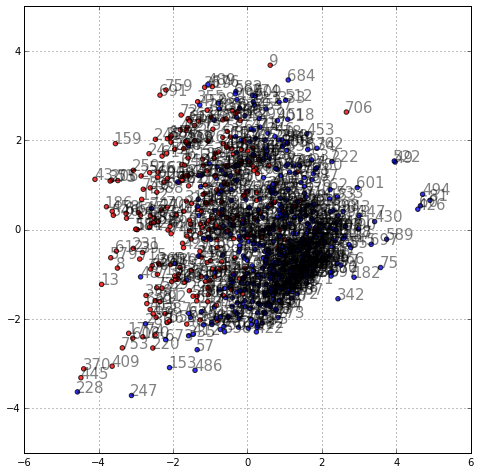

In [136]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8), dpi=160)
cm = generate_cmap(['blue', 'red'])
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.index):
    plt.text(x, y, name, alpha=0.5, size=15)
plt.scatter(feature[:, 0], feature[:, 1], c=cls, alpha=0.8, cmap=cm)
plt.grid()
plt.show()

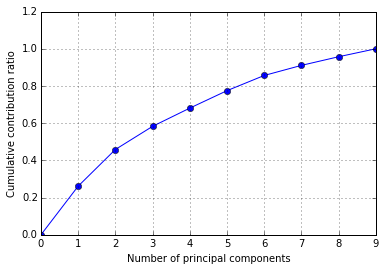

In [137]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution ratio")
plt.grid()
plt.show()

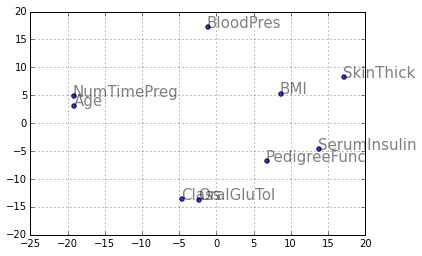

In [138]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :].T)
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :].T)
# 第一主成分と第二主成分でプロットする
plt.figure()
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.columns):
    plt.text(x, y, name, alpha=0.5, size=15)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.grid()
plt.show()

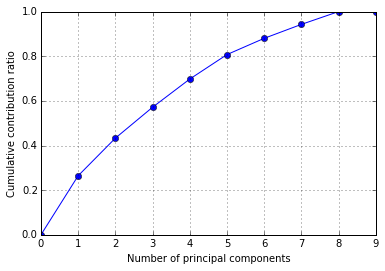

In [139]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution ratio")
plt.grid()
plt.show()

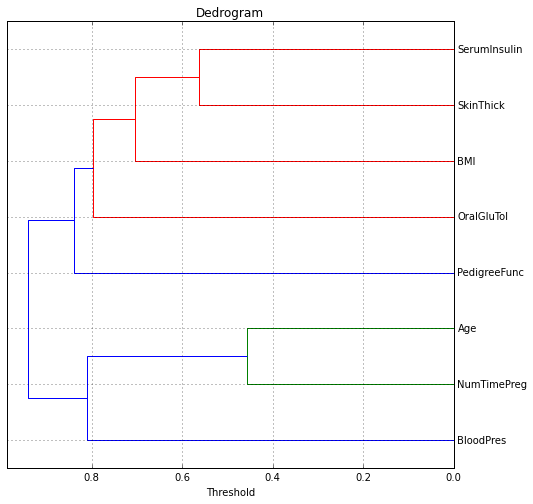

In [158]:
# metric は色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
# method も色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
#y_labels.append("1")
from scipy.cluster.hierarchy import linkage, dendrogram
result1 = linkage(dfs.iloc[:, :-1].T, 
                  #metric = 'braycurtis', 
                  #metric = 'canberra', 
                  #metric = 'chebyshev', 
                  #metric = 'cityblock', 
                  metric = 'correlation', 
                  #metric = 'cosine', 
                  #metric = 'euclidean', 
                  #metric = 'hamming', 
                  #metric = 'jaccard', 
                  #method= 'single')
                  method = 'average')
                  #method= 'complete')
                  #method='weighted')
#dendrogram(result1, labels = list(df.iloc[:, 0:1]))
plt.figure(figsize=(8, 8))
dendrogram(result1, orientation='right', labels=list(df.columns[:-1]), color_threshold=0.8)
plt.title("Dedrogram")
plt.xlabel("Threshold")
plt.grid()
plt.show()

In [160]:
feature_names = df.columns[0:]
target_names = list(set(df.iloc[:, ]))
sample_names = df.index
data = df.iloc[:, :]
target = df.iloc[:, -1]

In [161]:
from sklearn import cross_validation as cv
train_data, test_data, train_target, test_target = cv.train_test_split(data, target, test_size=0.5)

In [162]:
train_data

,NumTimePreg,OralGluTol,BloodPres,SkinThick,SerumInsulin,BMI,PedigreeFunc,Age,Class
585,1,93,56,11,0,22.5,0.417,22,0
684,5,136,82,0,0,0.0,0.640,69,0
373,2,105,58,40,94,34.9,0.225,25,0
231,6,134,80,37,370,46.2,0.238,46,1
576,6,108,44,20,130,24.0,0.813,35,0
87,2,100,68,25,71,38.5,0.324,26,0
361,5,158,70,0,0,29.8,0.207,63,0
697,0,99,0,0,0,25.0,0.253,22,0
694,2,90,60,0,0,23.5,0.191,25,0
286,5,155,84,44,545,38.7,0.619,34,0


In [163]:
# 様々なパラメータ（ハイパーパラメータという）で学習し、分離性能の最も良いモデルを選択する。
parameters = [
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
    {'kernel': ['rbf'],     'C': [1, 10, 100, 1000], 'gamma': [1e-2, 1e-3, 1e-4]},      
    {'kernel': ['poly'],'C': [1, 10, 100, 1000], 'degree': [2, 3, 4, 5]}]

In [164]:
from sklearn import svm
from sklearn.metrics import accuracy_score
import time
start = time.time()
from sklearn import grid_search

# train_data を使って、SVM による学習を行う
gs = grid_search.GridSearchCV(svm.SVC(), parameters, n_jobs=2).fit(train_data, train_target)

# 分離性能の最も良かったモデルが何だったか出力する
print(gs.best_estimator_)

# モデル構築に使わなかったデータを用いて、予測性能を評価する
pred_target = gs.predict(test_data)
print ("Accuracy_score:{0}".format(accuracy_score(test_target, pred_target)))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Accuracy_score:1.0
elapsed_time:60.67089796066284


In [165]:
# 予測結果と、本当の答えを比較する
df = pd.DataFrame(columns=['test', 'pred'])
df['test'] = test_target # 本当の答え
df['pred'] = pred_target # 予測された答え
df.T

,637,566,395,619,463,262,640,677,635,513,...,551,516,460,13,365,418,167,30,632,20
test,0,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
pred,0,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


###考察
申し訳ございません。まともに考える時間が取れなかったのでテキトーになります・・・。
今回作成したSVMで脅威の精度100%を叩き出した。しかし主成分分析のプロットを見るとちゃんと分離できるようには見えない。
第一主成分、第二主成分における各特徴変量の主成分負荷量などを見てみると原因がわかるかもしれない。  
また時間があれば(and学生実験で取り扱われる場合)もう少し考察してみます。

###ーーーーーーーーーーーーーーーーーーーーーーーーーーー 

###パーキンソン病診断データ  
###ーーーーーーーーーーーーーーーーーーーーーーーーーーー 

In [190]:
df = pd.read_csv('parkinsons.data', sep=',') # データの読み込み

In [191]:
dfs = df.iloc[: , 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0)

In [192]:
dfs

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.827171,-0.435045,-0.949593,0.334054,0.747835,0.132621,0.758847,0.131417,0.744070,0.737637,...,0.605972,-0.067719,-0.192729,0.569961,-0.805764,1.756293,0.799266,0.479243,-0.209990,0.866655
1,-0.768992,-0.529611,-0.057572,0.713581,1.035010,0.452726,1.273531,0.451521,1.677413,1.763924,...,1.544279,-0.137489,-0.632879,0.569961,-0.386529,1.832844,1.476053,1.307819,0.274371,1.798974
2,-0.907141,-0.721312,-0.109593,0.882719,1.322186,0.718919,1.581616,0.719960,1.199605,1.024997,...,1.172305,-0.290884,-0.279042,0.569961,-0.660375,1.937062,1.138515,1.015070,-0.103363,1.399060
3,-0.907286,-0.647425,-0.113935,0.773398,1.322186,0.577399,1.280780,0.576194,1.336955,1.204598,...,1.336788,-0.279998,-0.280624,0.569961,-0.611559,1.827676,1.437245,1.290518,0.061985,1.802314
4,-0.923281,-0.604689,-0.130272,1.365379,1.896537,1.092937,2.041931,1.093977,1.831733,1.548404,...,1.894585,-0.177569,-0.505444,0.569961,-0.781010,1.904461,1.776368,0.095948,-0.129692,2.261262
5,-0.813641,-0.720754,-0.058308,0.713581,1.035010,0.445987,1.469255,0.444782,0.917481,0.891580,...,0.750428,-0.312409,-0.114777,0.569961,-0.798251,1.933105,1.322252,0.870451,-0.507488,1.678035
6,-0.820526,-0.654278,-0.034572,-0.596201,-0.400868,-0.591827,-0.516988,-0.590783,-0.722765,-0.729953,...,-0.775551,-0.464567,0.677855,0.569961,0.938069,0.831522,0.045931,0.373735,-1.376809,0.057750
7,-1.133041,-0.910083,-0.275948,-0.684895,-0.400868,-0.628892,-0.589479,-0.630095,-0.744508,-0.760742,...,-0.726305,-0.529636,1.131110,0.569961,1.336176,0.816161,-0.443224,-0.513026,-0.828458,-0.474889
8,-1.413350,-0.710852,-0.564564,-0.146543,0.460659,-0.126833,-0.045799,-0.125790,-0.465565,-0.468250,...,-0.486311,-0.350015,-0.016714,0.569961,1.125780,1.002749,0.170352,1.214049,-0.154951,0.277625
9,-1.429634,-0.841629,-0.576696,-0.185734,0.460659,-0.211071,-0.045799,-0.212274,-0.070485,-0.139838,...,-0.123202,-0.361891,-0.005417,0.569961,0.466622,1.452295,0.616871,1.192791,0.133140,0.719162


In [193]:
cls = [x for x in dfs['status']]

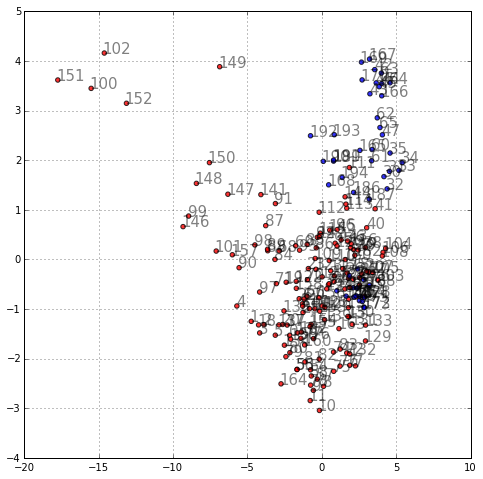

In [194]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8), dpi=160)
cm = generate_cmap(['blue', 'red'])
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.index):
    plt.text(x, y, name, alpha=0.5, size=15)
plt.scatter(feature[:, 0], feature[:, 1], c=cls, alpha=0.8, cmap=cm)
plt.grid()
plt.show()

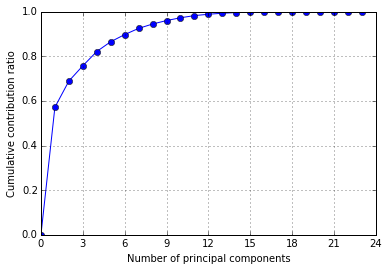

In [195]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution ratio")
plt.grid()
plt.show()

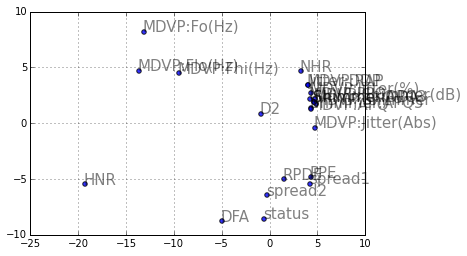

In [196]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :].T)
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :].T)
# 第一主成分と第二主成分でプロットする
plt.figure()
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.columns):
    plt.text(x, y, name, alpha=0.5, size=15)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.grid()
plt.show()

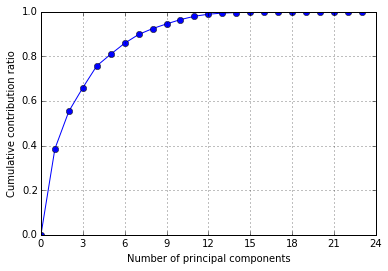

In [197]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution ratio")
plt.grid()
plt.show()

In [198]:
feature_names = df.columns[1:]
target_names = list(set(df.iloc[:, 1:]))
sample_names = df.index
data = df.iloc[:, 1:]
target = df.iloc[:, 17]

In [199]:
from sklearn import cross_validation as cv
train_data, test_data, train_target, test_target = cv.train_test_split(data, target, test_size=0.8)

In [200]:
train_data

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
167,260.105,264.919,237.303,0.00339,0.000010,0.00205,0.00186,0.00616,0.02030,0.197,...,0.03557,0.00910,21.083,0,0.440988,0.628058,-7.517934,0.160414,1.881767,0.075587
135,110.453,127.611,105.554,0.00494,0.000040,0.00244,0.00315,0.00731,0.04128,0.379,...,0.06688,0.02529,17.707,1,0.653427,0.706687,-5.333619,0.322044,2.631793,0.228319
161,115.322,135.738,107.802,0.00619,0.000050,0.00352,0.00329,0.01057,0.03273,0.325,...,0.04933,0.02810,19.388,1,0.577802,0.684373,-5.283009,0.226528,2.442906,0.238281
22,167.930,193.221,79.068,0.00442,0.000030,0.00220,0.00247,0.00661,0.04351,0.377,...,0.06685,0.01280,22.468,1,0.619060,0.679834,-4.330956,0.262384,2.916777,0.285695
186,116.556,592.030,86.228,0.00496,0.000040,0.00254,0.00263,0.00762,0.01660,0.154,...,0.02460,0.01397,23.958,0,0.566424,0.667654,-6.431119,0.153310,2.161936,0.120605
1,122.400,148.650,113.819,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
127,166.888,198.966,79.512,0.00638,0.000040,0.00368,0.00351,0.01104,0.02857,0.257,...,0.04641,0.01796,18.330,1,0.585169,0.736964,-5.825257,0.115697,1.996146,0.196535
182,149.818,163.417,144.786,0.00336,0.000020,0.00174,0.00198,0.00521,0.02145,0.198,...,0.03464,0.00595,23.008,1,0.329577,0.757180,-6.277170,0.109397,2.209021,0.156368
5,120.552,131.162,113.787,0.00968,0.000080,0.00463,0.00750,0.01388,0.04701,0.456,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
38,180.198,201.249,175.456,0.00284,0.000020,0.00153,0.00166,0.00459,0.01444,0.131,...,0.02177,0.00231,26.738,1,0.403884,0.766209,-6.452058,0.212294,2.269398,0.141929


In [201]:
# 様々なパラメータ（ハイパーパラメータという）で学習し、分離性能の最も良いモデルを選択する。
parameters = [
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
    {'kernel': ['rbf'],     'C': [1, 10, 100, 1000], 'gamma': [1e-2, 1e-3, 1e-4]},      
    {'kernel': ['poly'],'C': [1, 10, 100, 1000], 'degree': [2, 3, 4, 5]}]

In [202]:
from sklearn import svm
from sklearn.metrics import accuracy_score
import time
start = time.time()
from sklearn import grid_search

# train_data を使って、SVM による学習を行う
gs = grid_search.GridSearchCV(svm.SVC(), parameters, n_jobs=2).fit(train_data, train_target)

# 分離性能の最も良かったモデルが何だったか出力する
print(gs.best_estimator_)

# モデル構築に使わなかったデータを用いて、予測性能を評価する
pred_target = gs.predict(test_data)
print ("Accuracy_score:{0}".format(accuracy_score(test_target, pred_target)))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, degree=2, gamma=0.0,
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Accuracy_score:0.9487179487179487
elapsed_time:0.8791191577911377


In [203]:
# 予測結果と、本当の答えを比較する
df = pd.DataFrame(columns=['test', 'pred'])
df['test'] = test_target # 本当の答え
df['pred'] = pred_target # 予測された答え
df.T

,184,172,65,23,87,120,192,66,152,74,...,17,130,80,171,0,125,121,46,73,96
test,0,0,0,1,1,1,0,1,1,1,...,1,1,1,0,1,1,1,0,1,1
pred,1,0,0,1,1,1,0,1,1,1,...,1,1,1,0,1,1,1,0,1,1


###考察
申し訳ありません。こちらも糖尿病のほうと同じ感じです。  
このデータは病気のプラスマイナスの項目'status'が列の端っこに無いので、どうすればうまく'status'の列を引っ張ってこれるかが難しいと思いました。  
多分他のデータはだいたい最初の方か一番後ろにいるので、その辺が頭使うところかなあと思います。  
ただ1回の実習で果たして配列における要素の抜き出しを全員が理解できるかどうかは、・・・・・・ってところですね。